In [114]:
import pandas as pd
from io import StringIO

csv_data = \
'''A,B,C,D
1.0,2.0,3.0,4.0
5.0,6.0,,8.0
10.0,11.0,12.0,'''

df = pd.read_csv(StringIO(csv_data))
df


,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [115]:
# 欠損値をカウント
df.isnull().sum()


A    0
B    0
C    1
D    1
dtype: int64

In [116]:
df.dropna()



,A,B,C,D
0,1.0,2.0,3.0,4.0


In [117]:
df.dropna(axis=1)



,A,B
0,1.0,2.0
1,5.0,6.0
2,10.0,11.0


In [118]:
df.dropna(how='all')



,A,B,C,D
0,1.0,2.0,3.0,4.0
1,5.0,6.0,NaN,8.0
2,10.0,11.0,12.0,NaN


In [119]:
df.dropna(thresh=4)



,A,B,C,D
0,1.0,2.0,3.0,4.0


In [120]:
df.dropna(subset=['C'])



,A,B,C,D
0,1.0,2.0,3.0,4.0
2,10.0,11.0,12.0,NaN


In [121]:
from sklearn.preprocessing import Imputer

imr = Imputer(missing_values='NaN', strategy='mean', axis=0)
imr = imr.fit(df.values)
# 補完を実行
imputed_data = imr.transform(df.values)
imputed_data


/Users/yuuki/miniconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:66: DeprecationWarning: Class Imputer is deprecated; Imputer was deprecated in version 0.20 and will be removed in 0.22. Import impute.SimpleImputer from sklearn instead.
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

In [122]:

import pandas as pd
# サンプルデータの生成
df = pd.DataFrame([
    ['green', 'M', 10.1, 'class1'],
    ['red', 'L', 13.5, 'class2'],
    ['blue', 'XL', 15.3, 'class1']])

df.columns = ['color', 'size', 'price', 'classlabel']
df


,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [123]:
# Tシャツのサイズと整数を対応させるDictを作成
size_mapping = { 'XL': 3, 'L': 2, 'M': 1}
# Tシャツのサイズを整数に変換
df['size'] = df['size'].map(size_mapping)
df


,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [124]:
inv_size_mapping = {v: k for k, v in size_mapping.items()}
print('inv_size_mapping:', inv_size_mapping)
df['size'].map(inv_size_mapping)


inv_size_mapping: {3: 'XL', 2: 'L', 1: 'M'}


0     M
1     L
2    XL
Name: size, dtype: object

In [125]:
import numpy as np
# クラスラベルと整数を対応させるディクショナリを生成
class_mapping = {label:idx for idx, label in enumerate(np.unique(df['classlabel']))}
class_mapping


{'class1': 0, 'class2': 1}

In [126]:
df['classlabel'] = df['classlabel'].map(class_mapping)
df


,color,size,price,classlabel
0,green,1,10.1,0
1,red,2,13.5,1
2,blue,3,15.3,0


In [127]:
inv_class_mapping = {v: k for k, v in class_mapping.items()}
# 整数からクラスラベルに変換
df['classlabel'] = df['classlabel'].map(inv_class_mapping)
df


,color,size,price,classlabel
0,green,1,10.1,class1
1,red,2,13.5,class2
2,blue,3,15.3,class1


In [128]:
from sklearn.preprocessing import LabelEncoder
class_le = LabelEncoder()
y = class_le.fit_transform(df['classlabel'].values)
y


array([0, 1, 0])

In [129]:
class_le.inverse_transform(y)


array(['class1', 'class2', 'class1'], dtype=object)

In [130]:
X = df[['color','size','price']].values
print(X)
color_le = LabelEncoder()
X[:, 0] = color_le.fit_transform(X[:, 0])
X


[['green' 1 10.1]
 ['red' 2 13.5]
 ['blue' 3 15.3]]


array([[1, 1, 10.1],
       [2, 2, 13.5],
       [0, 3, 15.3]], dtype=object)

In [131]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()


/Users/yuuki/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 0. ,  1. ,  0. ,  1. , 10.1],
       [ 0. ,  0. ,  1. ,  2. , 13.5],
       [ 1. ,  0. ,  0. ,  3. , 15.3]])

In [132]:
pd.get_dummies(df[['price','color','size']])



,price,size,color_blue,color_green,color_red
0,10.1,1,0,1,0
1,13.5,2,0,0,1
2,15.3,3,1,0,0


In [133]:
# 多重共線性の問題から、特徴量の列を1つ削除
pd.get_dummies(df[['price','color','size']], drop_first=True)


,price,size,color_green,color_red
0,10.1,1,1,0
1,13.5,2,0,1
2,15.3,3,0,0


In [134]:
ohe = OneHotEncoder(categorical_features=[0])
ohe.fit_transform(X).toarray()[:, 1:]


/Users/yuuki/miniconda3/lib/python3.7/site-packages/sklearn/preprocessing/_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[ 1. ,  0. ,  1. , 10.1],
       [ 0. ,  1. ,  2. , 13.5],
       [ 0. ,  0. ,  3. , 15.3]])

In [135]:
# wineデータセットを読み込む
df_wine = pd.read_csv('https://archive.ics.uci.edu/'
                    'ml/machine-learning-databases/wine/wine.data',
                    header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 
                    'Alcalinity of ash', 'Magnesium', 'Total phenols',
                    'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 
                    'Color intensity', 'Hue', 
                    'OD280/OD315 of diluted wines', 'Proline']
print('Class labels', np.unique(df_wine['Class label']))
df_wine.head()


Class labels [1 2 3]


,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [136]:
from sklearn.model_selection import train_test_split
# 特徴量とラベルを別々に抽出
X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
# トレーニングデータとテストデータに分割
X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.3, random_state=0, stratify=y)



In [137]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)


In [138]:
ex = np.array([0,1,2,3,4,5])
print('standardized:', (ex-ex.mean()) /ex.std() )
print('normalized:', (ex -ex.min())/(ex.max() - ex.min()))



standardized: [-1.46385011 -0.87831007 -0.29277002  0.29277002  0.87831007  1.46385011]
normalized: [0.  0.2 0.4 0.6 0.8 1. ]


In [139]:
from sklearn.preprocessing import StandardScaler
stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)



In [140]:
from sklearn.linear_model import LogisticRegression
LogisticRegression(penalty='l1')


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [141]:
lr = LogisticRegression(penalty='l1', C=1.0)
lr.fit(X_train_std, y_train)

print("Training Accuracy:", lr.score(X_train_std, y_train))
print("Test Accuracy:", lr.score(X_test_std, y_test))


Training Accuracy: 1.0
Test Accuracy: 1.0


In [142]:
lr.intercept_



array([-1.26357043, -1.21621037, -2.37050522])

In [143]:
lr.coef_


array([[ 1.24631061,  0.18122217,  0.74212027, -1.15983978,  0.        ,
         0.        ,  1.17570325,  0.        ,  0.        ,  0.        ,
         0.        ,  0.54285398,  2.51102714],
       [-1.53720529, -0.38686213, -0.99475258,  0.36429292, -0.05960293,
         0.        ,  0.66734229,  0.        ,  0.        , -1.93352129,
         1.23535957,  0.        , -2.23263461],
       [ 0.13577785,  0.168386  ,  0.3571123 ,  0.        ,  0.        ,
         0.        , -2.43827135,  0.        ,  0.        ,  1.5636166 ,
        -0.81873115, -0.49229614,  0.        ]])

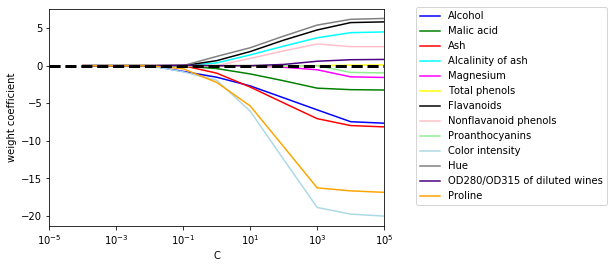

In [144]:
import matplotlib.pyplot as plt

fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'green', 'red', 'cyan', 
        'magenta', 'yellow', 'black', 
        'pink', 'lightgreen', 'lightblue', 
        'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4., 6.):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)
# 各重み係数をプロット
for column, color in zip(range(weights.shape[1]), colors):
    # 横軸を逆正則化パラメータ、縦軸を重み係数とした折れ線グラフ
    plt.plot(params, weights[:, column], label=df_wine.columns[column+1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')

plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()


In [145]:
from sklearn.base import clone
from itertools import combinations
import numpy as np
from sklearn.base import clone
from sklearn.metrics import accuracy_score

class SBS():
    """
    逐次後退選択(Sequential backward selection)を実行するクラス
    """

    def __init__(self, estimator, k_features, scoring=accuracy_score,
                    test_size=0.25, random_state=1):
        self.scoring = scoring # 特徴量の評価指標
        self.estimator = estimator # 推定器
        self.k_features = k_features 
        self.test_size = test_size
        self.random_state = random_state
    
    def fit(self, X, y):
        X_train, X_test, y_train, y_test = \
            train_test_split(X, y, test_size=self.test_size,
                                random_state=self.random_state)

        # すべての特徴量の個数、列インデックス
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        # すべての特徴量を用いてスコア算出
        score = self._calc_score(X_train, y_train, X_test, y_test, self.indices_)

        self.scores_ = [score]
        # 指定した特徴量の個数になるまで反復
        while dim > self.k_features:
            scores = [] # スコア
            subsets = [] # 列インデックス

            # 特徴量の部分集合を表す列インデックスの組み合わせごとに反復
            for p in combinations(self.indices_, r=dim -1):
                score = self._calc_score(X_train, y_train, X_test, y_test, p)

                scores.append(score)
                # 特徴量の部分集合を表す列インデックスのリストを格納
                subsets.append(p)
            
            # 最良のスコアのインデックスを抽出
            best = np.argmax(scores)
            # 最良となる列インデックスを抽出して格納
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            # 次元数を減らして次のステップへ
            dim -= 1

            # スコアを格納
            self.scores_.append(scores[best])
        
        # 最後に格納したスコア
        self.k_score_ = self.scores_[-1]

        return self
    
    def transform(self, X):
        # 抽出した特徴量を返す
        return X[:, self.indices_]

    def _calc_score(self, X_train, y_train, X_test, y_test, indices):
        # 指定された列番号indicesの特徴量を抽出してモデルを適合
        self.estimator.fit(X_train[:, indices], y_train)
        # テストデータを用いてクラスラベルを予測
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score



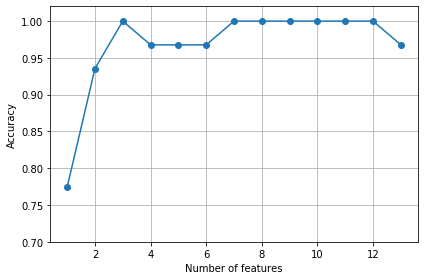

In [146]:
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt

knn = KNeighborsClassifier(n_neighbors=5)
# 特徴量の個数が1になるまで特徴量を選択
sbs = SBS(knn, k_features=1)

sbs.fit(X_train_std, y_train)

# 特徴量の個数のリスト
k_feat = [len(k) for k in sbs.subsets_]

# 横軸を特徴量の個数、縦軸をスコアとしたグラフ
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.02])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.tight_layout()
plt.show()



In [147]:
k3 = list(sbs.subsets_[10])
print(df_wine.columns[1:][k3])



Index(['Alcohol', 'Malic acid', 'OD280/OD315 of diluted wines'], dtype='object')


In [148]:
# 13すべての特徴量を用いてモデルを適合
knn.fit(X_train_std, y_train)

print('Trainig accuracy:', knn.score(X_train_std, y_train))
print('Test accuracy:', knn.score(X_test_std, y_test))



Trainig accuracy: 0.967741935483871
Test accuracy: 0.9629629629629629


In [149]:
# 3つの特徴量でモデルを適合
knn.fit(X_train_std[:, k3], y_train)
print('Trainig accuracy:', knn.score(X_train_std[:, k3], y_train))
print('Test accuracy:', knn.score(X_test_std[:, k3], y_test))



Trainig accuracy: 0.9516129032258065
Test accuracy: 0.9259259259259259


1 Proline                        0.185453
 2 Flavanoids                     0.174751
 3 Color intensity                0.143920
 4 OD280/OD315 of diluted wines   0.136162
 5 Alcohol                        0.118529
 6 Hue                            0.058739
 7 Total phenols                  0.050872
 8 Magnesium                      0.031357
 9 Malic acid                     0.025648
10 Proanthocyanins                0.025570
11 Alcalinity of ash              0.022366
12 Nonflavanoid phenols           0.013354
13 Ash                            0.013279


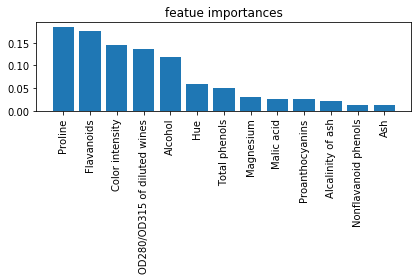

In [150]:
from sklearn.ensemble import RandomForestClassifier
# Wineデータセットの特徴量の名称
feat_labels = df_wine.columns[1:]

forest = RandomForestClassifier(n_estimators=500, random_state=1)
forest.fit(X_train, y_train)

importances = forest.feature_importances_
# 重要度の降順で特徴量のインデックスを取得
indices = np.argsort(importances)[::-1]

for f in range(X_train.shape[1]):
    print("%2d %-*s %f" % 
                (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))

plt.title("featue importances")
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feat_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()



In [151]:
from sklearn.feature_selection import SelectFromModel
# 特徴量選択オブジェクトを生成(重要度の閾値を0.1に)
sfm = SelectFromModel(forest, threshold=0.1, prefit=True)

X_selected = sfm.transform(X_train)
print('Number of features that meet this threshold criterion:', X_selected.shape[1])

for f in range(X_selected.shape[1]):
    print("%2d %-*s %f" % 
                (f+1, 30, feat_labels[indices[f]], importances[indices[f]]))


Number of features that meet this threshold criterion: 5
 1 Proline                        0.185453
 2 Flavanoids                     0.174751
 3 Color intensity                0.143920
 4 OD280/OD315 of diluted wines   0.136162
 5 Alcohol                        0.118529
